<a href="https://colab.research.google.com/github/seanzhu815/415/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
from google.colab import files
uploaded_files = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis (2).csv


In [91]:

# Web Scraping
import requests
from bs4 import BeautifulSoup
import numpy as np
# Preprocess
import spacy
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd

# EDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [210]:
all_books = pd.read_csv('/content/sentiment_analysis (2).csv')
all_books=all_books.drop(columns='Unnamed: 0')
all_books=all_books[1:]
all_books

,score,id,subreddit,body
1,900,is7us0w,Dallas,I don't know shit but here's my headcannon exp...
2,451,is82psq,Dallas,I'd pay thousands more to not be in Oklahoma C...
3,265,is7u164,Dallas,You should always do what makes you happy.
4,175,is7y6dm,Dallas,There’s also all these companies (jobs) moving...
5,108,is81ece,Dallas,Damn and I thought I was cynical about Dallas....
...,...,...,...,...
491,5,iscpwhx,Dallas,How does being “business friendly” lower wages...
492,2,isarp8g,Dallas,Howdy ho neighborino!
493,7,is8pgph,Dallas,That is QUITE a stretch. How dare you
494,2,is90ppa,Dallas,ANyone who loves the outdoors should not live ...


In [214]:
all_books['token'] = all_books['body'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])
sid = SentimentIntensityAnalyzer()
all_books['scores sentiment'] = all_books['body'].apply(lambda x: sid.polarity_scores(x))
c=[]
for i in range(1,len(all_books.index)+1):
  c.append(all_books.loc[i,'scores sentiment'].get('compound'))
all_books['compound']=c
all_books

,score,id,subreddit,body,token,scores sentiment,compound
1,900,is7us0w,Dallas,I don't know shit but here's my headcannon exp...,"[I, do, know, shit, but, here, my, headcannon,...","{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.6010
2,451,is82psq,Dallas,I'd pay thousands more to not be in Oklahoma C...,"[I, pay, thousands, more, to, not, be, in, Okl...","{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",-0.1027
3,265,is7u164,Dallas,You should always do what makes you happy.,"[You, should, always, do, what, makes, you, ha...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.5719
4,175,is7y6dm,Dallas,There’s also all these companies (jobs) moving...,"[There, s, also, all, these, companies, jobs, ...","{'neg': 0.0, 'neu': 0.908, 'pos': 0.092, 'comp...",0.6808
5,108,is81ece,Dallas,Damn and I thought I was cynical about Dallas....,"[Damn, and, I, thought, I, was, cynical, about...","{'neg': 0.129, 'neu': 0.644, 'pos': 0.227, 'co...",0.8382
...,...,...,...,...,...,...,...
491,5,iscpwhx,Dallas,How does being “business friendly” lower wages...,"[How, does, being, business, friendly, lower, ...","{'neg': 0.081, 'neu': 0.856, 'pos': 0.063, 'co...",0.0516
492,2,isarp8g,Dallas,Howdy ho neighborino!,"[Howdy, ho, neighborino]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
493,7,is8pgph,Dallas,That is QUITE a stretch. How dare you,"[That, is, QUITE, a, stretch, How, dare, you]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
494,2,is90ppa,Dallas,ANyone who loves the outdoors should not live ...,"[ANyone, who, loves, the, outdoors, should, no...","{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719


In [215]:
all_books['total_score']=all_books['compound']*all_books['score']

In [216]:
all_books['ratio']=all_books['score']/all_books['score'].sum()

In [217]:
all_books['total_score']=all_books['compound']*all_books['ratio']
all_books['total_score'].sum()

0.274477457753215

In [218]:
all_books['all'] = all_books['body'].apply(lambda x: [item for item in x if item.isalpha()])
sid = SentimentIntensityAnalyzer()
all_books['scores sentiment_all'] = all_books['body'].apply(lambda x: sid.polarity_scores(x))

In [219]:
df_all = all_books
df_all

,score,id,subreddit,body,token,scores sentiment,compound,total_score,ratio,all,scores sentiment_all
1,900,is7us0w,Dallas,I don't know shit but here's my headcannon exp...,"[I, do, know, shit, but, here, my, headcannon,...","{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.6010,0.057488,0.095653,"[I, d, o, n, t, k, n, o, w, s, h, i, t, b, u, ...","{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp..."
2,451,is82psq,Dallas,I'd pay thousands more to not be in Oklahoma C...,"[I, pay, thousands, more, to, not, be, in, Okl...","{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",-0.1027,-0.004923,0.047933,"[I, d, p, a, y, t, h, o, u, s, a, n, d, s, m, ...","{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp..."
3,265,is7u164,Dallas,You should always do what makes you happy.,"[You, should, always, do, what, makes, you, ha...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.5719,0.016107,0.028165,"[Y, o, u, s, h, o, u, l, d, a, l, w, a, y, s, ...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."
4,175,is7y6dm,Dallas,There’s also all these companies (jobs) moving...,"[There, s, also, all, these, companies, jobs, ...","{'neg': 0.0, 'neu': 0.908, 'pos': 0.092, 'comp...",0.6808,0.012662,0.018599,"[T, h, e, r, e, s, a, l, s, o, a, l, l, t, h, ...","{'neg': 0.0, 'neu': 0.908, 'pos': 0.092, 'comp..."
5,108,is81ece,Dallas,Damn and I thought I was cynical about Dallas....,"[Damn, and, I, thought, I, was, cynical, about...","{'neg': 0.129, 'neu': 0.644, 'pos': 0.227, 'co...",0.8382,0.009621,0.011478,"[D, a, m, n, a, n, d, I, t, h, o, u, g, h, t, ...","{'neg': 0.129, 'neu': 0.644, 'pos': 0.227, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...
491,5,iscpwhx,Dallas,How does being “business friendly” lower wages...,"[How, does, being, business, friendly, lower, ...","{'neg': 0.081, 'neu': 0.856, 'pos': 0.063, 'co...",0.0516,0.000027,0.000531,"[H, o, w, d, o, e, s, b, e, i, n, g, b, u, s, ...","{'neg': 0.081, 'neu': 0.856, 'pos': 0.063, 'co..."
492,2,isarp8g,Dallas,Howdy ho neighborino!,"[Howdy, ho, neighborino]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.000213,"[H, o, w, d, y, h, o, n, e, i, g, h, b, o, r, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
493,7,is8pgph,Dallas,That is QUITE a stretch. How dare you,"[That, is, QUITE, a, stretch, How, dare, you]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.000744,"[T, h, a, t, i, s, Q, U, I, T, E, a, s, t, r, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
494,2,is90ppa,Dallas,ANyone who loves the outdoors should not live ...,"[ANyone, who, loves, the, outdoors, should, no...","{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,0.000122,0.000213,"[A, N, y, o, n, e, w, h, o, l, o, v, e, s, t, ...","{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp..."


In [198]:
all_books

,score,id,subreddit,body,token,scores sentiment,compound,total_score,ratio
1,2754,it2yz01,wallstreetbets,Housing is illiquid as fuck. Sellers are also ...,"[Housing, is, illiquid, as, fuck, Sellers, are...","{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",-0.5423,-0.089769,0.165535
2,632,it35j15,wallstreetbets,I have family who've been in real estate in th...,"[I, have, family, who, been, in, real, estate,...","{'neg': 0.07, 'neu': 0.831, 'pos': 0.099, 'com...",0.3818,0.014504,0.037988
3,919,it2w3pi,wallstreetbets,"When locked in at 2.5%, why sell and buy at 7....","[When, locked, in, at, why, sell, and, buy, at...","{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp...",-0.5255,-0.029028,0.055238
4,523,it34xfv,wallstreetbets,What doesn’t make sense? Millions of people ha...,"[What, doesn, t, make, sense, Millions, of, pe...","{'neg': 0.164, 'neu': 0.806, 'pos': 0.03, 'com...",-0.7003,-0.022015,0.031436
5,44,it36lfh,wallstreetbets,Unlike other investments you can chill and liv...,"[Unlike, other, investments, you, can, chill, ...","{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.9173,0.002426,0.002645
...,...,...,...,...,...,...,...,...,...
493,3,it5riwc,wallstreetbets,No paralegals or assistants?,"[No, paralegals, or, assistants]","{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...",-0.2960,-0.000053,0.000180
494,3,it7fegh,wallstreetbets,She earns 250 an hour for billable hpurs...min...,"[She, earns, an, hour, for, billable, hpurs, m...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.000180
495,3,it7yzld,wallstreetbets,No just those going into teaching. \n\nYeah it...,"[No, just, those, going, into, teaching, Yeah,...","{'neg': 0.156, 'neu': 0.793, 'pos': 0.051, 'co...",-0.8750,-0.000158,0.000180
496,6,it5zhs4,wallstreetbets,How can you budget for that? The expectation ...,"[How, can, you, budget, for, that, The, expect...","{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...",-0.6597,-0.000238,0.000361


In [202]:
m=0
for i in range(1,147):
  if all_books.loc[i,'compound']>0:
    m+=1
m

49

In [203]:
n=0
for i in range(1,147):
  if all_books.loc[i,'compound']<0:
    n+=1
n

72

In [204]:
m/(m+n)

0.4049586776859504

In [205]:
n/(m+n)

0.5950413223140496

In [ ]:
df_all['token'] = df_all['body'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

# after remove stopwords and stemmer
stop = stopwords.words('english')
porter_stemmer = PorterStemmer()
df_all['clean token'] = df_all['token'].apply(lambda x: [item for item in x if item not in stop_words])\
.apply(lambda x: [porter_stemmer.stem(item) for item in x])
df_all.head(15)

In [69]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df_all['body'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df_all['body'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

In [223]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)

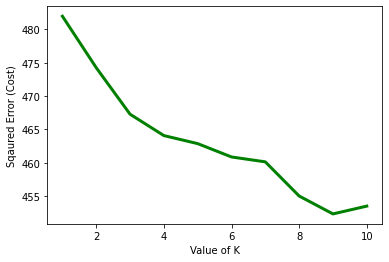

In [224]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot

In [225]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(df_all.body)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(495, 3153)


In [232]:
random_state = 600
cls = MiniBatchKMeans(n_clusters=4, random_state=random_state)
cls.fit(X_tfidf)
cls.predict(X_tfidf)

array([1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 0, 1, 3, 1, 3, 1, 3, 1, 1,
       0, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 0, 1, 3,
       1, 1, 1, 2, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 0, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 3, 1, 3, 1, 1, 0, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1,
       3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 1, 3, 1, 1, 0, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [233]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X_tfidf.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

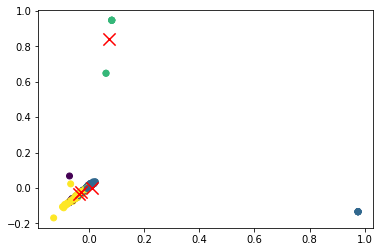

In [234]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X_tfidf))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')